In [1]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd

Pagina principa:https://www.meteored.mx

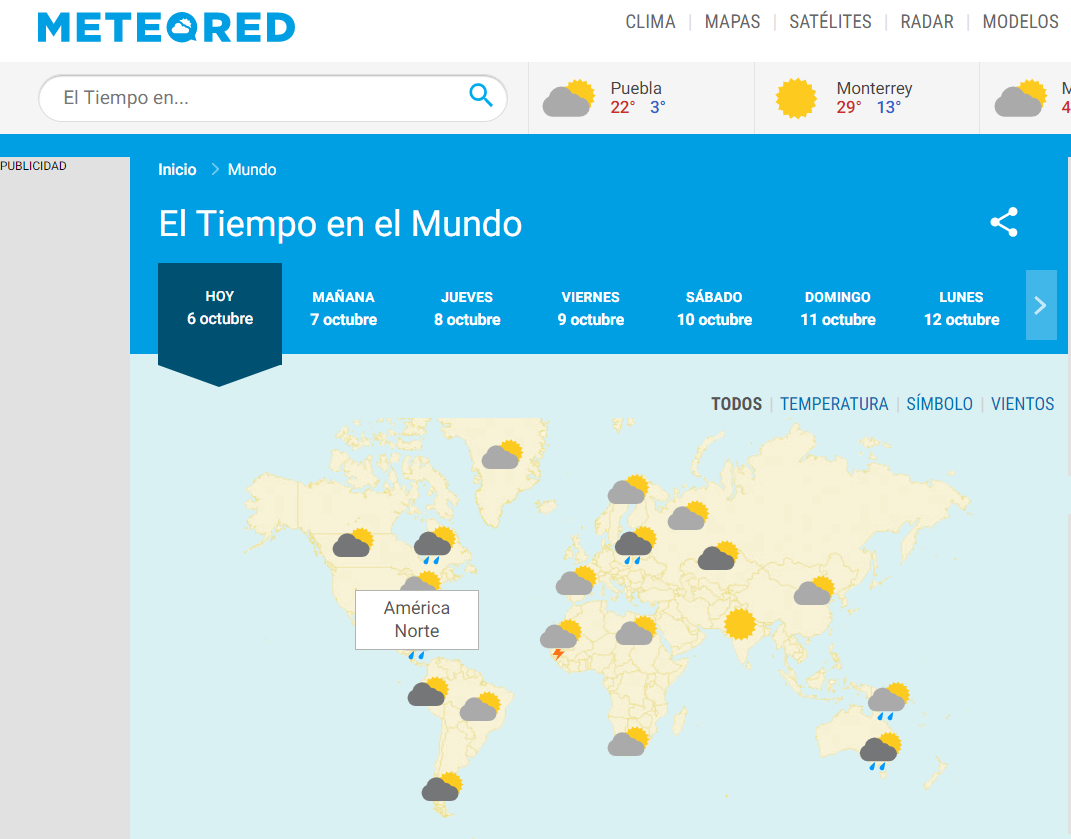

Dentro de la pagina de meteored encontramos un apartado donde dividen el clima por distintas zonas(https://www.meteored.mx/mundo.htm).
Manualmente se saco el link de cada una de ellas.

In [2]:
# links principales
padres=["https://www.meteored.mx/clima-Europa-1-1.html","https://www.meteored.mx/clima-America+Norte-1-3.html","https://www.meteored.mx/clima-America+Central-1-4.html","https://www.meteored.mx/clima-America+Sur-1-6.html","https://www.meteored.mx/clima-Asia-1-7.html","https://www.meteored.mx/clima-Africa-1-5.html","https://www.meteored.mx/clima-Oceania-1-2.html","https://www.meteored.mx/clima-Antartida-1-8.html"]

Para cada zona se procedio a sacar sus pricipales países
Ejemplo:
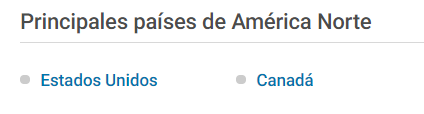

In [3]:
links=[]
for i in range(8):
    result= requests.get(padres[i])
    statusCode=result.status_code
    htmlText=result.text
    html=soup(result.text, "html.parser")
    entradas=html.find_all('li',{'class': 'li_hijos'})
    for i, entrada in enumerate(entradas):
        links.append(entrada.find('a').get('href'))
links

['https://www.meteored.mx/clima-Europa-Espana-1-1-18.html',
 'https://www.meteored.mx/clima-Europa-Alemania-1-1-19.html',
 'https://www.meteored.mx/clima-Europa-Francia-1-1-135.html',
 'https://www.meteored.mx/clima-Europa-Federacion+Rusa-1-1-122.html',
 'https://www.meteored.mx/clima-Europa-Reino+Unido-1-1-48.html',
 'https://www.meteored.mx/clima-Europa-Italia-1-1-20.html',
 'https://www.meteored.mx/clima-Europa-Suiza-1-1-137.html',
 'https://www.meteored.mx/clima-Europa-Holanda-1-1-21.html',
 'https://www.meteored.mx/clima-Europa-Portugal-1-1-182.html',
 'https://www.meteored.mx/clima-Europa-Austria-1-1-164.html',
 'https://www.meteored.mx/clima-Europa-Republica+Checa-1-1-120.html',
 'https://www.meteored.mx/clima-Europa-Irlanda-1-1-83.html',
 'https://www.meteored.mx/clima-Europa-Suecia-1-1-140.html',
 'https://www.meteored.mx/clima-Europa-Belgica-1-1-25.html',
 'https://www.meteored.mx/clima-Europa-Dinamarca-1-1-198.html',
 'https://www.meteored.mx/clima-Europa-Noruega-1-1-13.html

In [5]:
#Ahora vemos a visitar todos los paises para sacar las subdiviciones

In [ ]:
linksfinales=[]
segundoAcceso=[]

#recorremos la lista de paises 
for i in range(len(links)):
    result= requests.get(links[i])
    statusCode=result.status_code
    htmlText=result.text
    html=soup(result.text, "html.parser")
    aux=html.find_all('li',{'class': 'li_hijos'})
    
    if len(aux)==0:   #si no existen una divicion de cada pais por regiones 
        #entramos a las principales ciudades
        aux2=html.find_all('li',{'class': 'li-top-prediccion'})
        for i, entrada in enumerate(aux2):
            linksfinales.append(entrada.find('a').get('href'))
    else:
        #entramos a regiones
        aux2=html.find_all('li',{'class': 'li_hijos'})
        for i, entrada in enumerate(aux2):
            segundoAcceso.append(entrada.find('a').get('href'))
        #entramos a ciudades
        for x in range(len(segundoAcceso)):
            result= requests.get(segundoAcceso[x])
            statusCode=result.status_code
            htmlText=result.text
            html=soup(result.text, "html.parser")
            ux2=html.find_all('li',{'class': 'li-top-prediccion'})
            #extraemos links para cada ciudad
            for i, entrada in enumerate(ux2):
                linksfinales.append(entrada.find('a').get('href'))
print("listo")

In [8]:
len(linksfinales)

Procedemos a guardar los links de todas las localizaciones donde e tiene registro de clima

In [9]:
fichero= open ("linksFinales.txt","w")
for i in range(len(linksfinales)):
    fichero.write(linksfinales[i])
    fichero.write("\n")
    
fichero.close()

https://www.meteored.mx/clima_Bertamirans-Europa-Espana-A+Coruna--1-85135.html
